In [9]:
import numpy as np
import dolfin as dl
import scipy.sparse as sps
import scipy.sparse.linalg as spla
import matplotlib.pyplot as plt

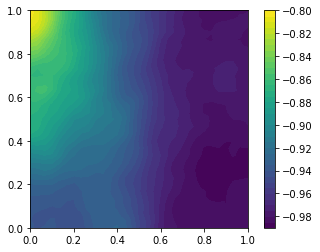

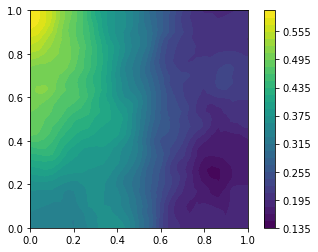

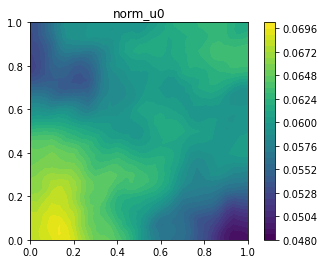

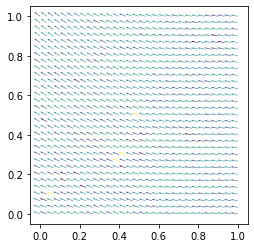

In [26]:
np.random.seed(0)

n=30

mesh = dl.UnitSquareMesh(n,n)
V = dl.FunctionSpace(mesh, 'CG', 1)

u_trial = dl.TrialFunction(V)
v_test = dl.TestFunction(V)

K = dl.assemble(dl.inner(dl.grad(u_trial), dl.grad(v_test))*dl.dx)
M = dl.assemble(u_trial * v_test * dl.dx)

def convert_fenics_csr_matrix_to_scipy_csr_matrix(A_fenics):
    ai, aj, av = dl.as_backend_type(A_fenics).mat().getValuesCSR()
    A_scipy = sps.csr_matrix((av, aj, ai))
    return A_scipy

K_scipy = convert_fenics_csr_matrix_to_scipy_csr_matrix(K)
M_scipy = convert_fenics_csr_matrix_to_scipy_csr_matrix(M)

A_scipy = K_scipy + M_scipy
solve_A_scipy = spla.factorized(A_scipy)

ux0_vec = solve_A_scipy(M_scipy * np.random.randn(V.dim()))
uy0_vec = solve_A_scipy(M_scipy * np.random.randn(V.dim()))

u0_arr = np.array([ux0_vec, uy0_vec]).T

norm_u0_vec = np.linalg.norm(u0_arr, axis=1)

ux_vec = ux0_vec / norm_u0_vec
uy_vec = uy0_vec / norm_u0_vec

u_arr = np.array([ux_vec, uy_vec]).T

ux = dl.Function(V)
ux.vector()[:] =  ux_vec

uy = dl.Function(V)
uy.vector()[:] =  uy_vec

cm = dl.plot(ux)
plt.colorbar(cm)
plt.figure()
cm = dl.plot(uy)
plt.colorbar(cm)

norm_u0 = dl.Function(V)
norm_u0.vector()[:] = norm_u0_vec

plt.figure()
cm = dl.plot(norm_u0)
plt.colorbar(cm)
plt.title('norm_u0')

V2 = dl.VectorFunctionSpace(mesh, 'CG', 1)

u2 = dl.Function(V2)
dl.assign(u2.sub(0), ux)
dl.assign(u2.sub(1), uy)

plt.figure()
dl.plot(u2, scale=30.)

In [21]:
np.sqrt(ux_vec**2 + uy_vec**2)


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.